In [2]:
import pandas
import re
import numpy as np
import scipy as sp
import sklearn.datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.linear_model import Perceptron
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from operator import itemgetter
from sklearn.svm import SVC
from sklearn import metrics

## Неделя 1

#### Assignment 1

In [25]:
data = pandas.read_csv('titanic.csv', index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [ ]:
data['Sex'].value_counts()

In [ ]:
print data['Survived'].value_counts()
342./(549+342)*100

In [ ]:
print data['Pclass'].value_counts()
216./(491+216+184)*100

In [ ]:
print data['Age'].mean()
print data['Age'].median()

In [ ]:
data[['Parch','SibSp']].corr()

In [ ]:
names = data[data.Sex =='female']['Name'].tolist()
names = np.array(names, dtype=pandas.Series)

n = []
for i in names:
    n.append(re.findall('Miss. ([a-zA-Z]*)',i))
    n.append(re.findall('\(([a-zA-Z]*)',i))
n = filter(None, n)
dic = {}
for i in n:
    for j in i:
        if not j in dic:
            dic[j] = 1
        else:
            dic[j] += 1
            
dic

#### Assignment 2

In [ ]:
data = data.dropna()
df1 = data[["Pclass","Fare","Age","Sex"]].as_matrix()
df2 = data[["Survived"]].as_matrix()
for i in enumerate(df1.T[3]):
    if df1.T[3][i[0]] == "female":
        df1.T[3][i[0]] = 0
    else:
        df1.T[3][i[0]] = 1
        
df1

In [ ]:
clf = DecisionTreeClassifier(random_state=241)
clf.fit(df1, df2)

In [ ]:
importances = clf.feature_importances_
importances

## Неделя 2

#### Assignment 1

In [ ]:
wine = pandas.read_csv('wine.data',header=None)

In [ ]:
wine.head()

In [ ]:
x = np.array(wine[range(1,14)])
y = np.ravel(np.array(wine[[0]]))

x_sc = preprocessing.scale(x)
y_sc = y

kf = KFold(y.size,n_folds=5,shuffle=True,random_state=42)
dic = {}
dic_sc = {}

for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh_sc = KNeighborsClassifier(n_neighbors=i)
    
    [neigh.fit(x[train_index], y[train_index]) for train_index, test_index in kf]
    [neigh_sc.fit(x_sc[train_index], y_sc[train_index]) for train_index, test_index in kf]
    
    dic[i] = np.mean(cross_val_score(neigh, x, y, cv=kf, n_jobs=-1))
    dic_sc[i] = np.mean(cross_val_score(neigh_sc, x_sc, y_sc, cv=kf, n_jobs=-1))
s_dic = sorted(dic.items(), key=itemgetter(1))
print s_dic

s_dic = sorted(dic_sc.items(), key=itemgetter(1))
print s_dic

#### Assignment 2

In [ ]:
boston = sklearn.datasets.load_boston()
x, y = boston.data, boston.target
x_sc = preprocessing.scale(x)

dic = {}

kf = KFold(y.size,n_folds=5,shuffle=True,random_state=42)
for i in np.linspace(1,10,num=200):
    neigh = KNeighborsRegressor(n_neighbors=5,weights='distance',p=i)
    [neigh.fit(x_sc[train_index], y[train_index]) for train_index, test_index in kf]
    dic[i] = np.mean(cross_val_score(neigh, x_sc, y, cv=kf, scoring='mean_squared_error', n_jobs=-1))
    
s_dic = sorted(dic.items(), key=itemgetter(1))
print s_dic

#### Assignment 3

In [ ]:
p_test = pandas.read_csv('perceptron-test.csv',header=None)
p_train = pandas.read_csv('perceptron-train.csv',header=None)

p_train.head()

In [ ]:
x_test = np.array(p_test[range(1,3)])
y_test = np.ravel(np.array(p_test[[0]]))
x_train = np.array(p_train[range(1,3)])
y_train = np.ravel(np.array(p_train[[0]]))

clf = Perceptron(random_state=241)
res1 = clf.fit(x_train, y_train).score(x_test,y_test)
print res1

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

res2 = clf.fit(X_train_scaled, y_train).score(X_test_scaled,y_test)
print res2

print res2-res1

## Неделя 3

#### Assignment 1

In [ ]:
svm_dat = pandas.read_csv('svm-data.csv',header=None)
svm_dat.head()

In [ ]:
x_test = np.array(svm_dat[range(1,3)])
y_test = np.ravel(np.array(svm_dat[[0]]))

clf = SVC(kernel='linear', C=100000, random_state=241)
clf.fit(x_test,y_test).support_

#### Assignment 2

In [ ]:
from sklearn import datasets

newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )

In [ ]:
y = newsgroups.target

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1)
corpus = vectorizer.fit_transform(newsgroups.data)

res = {}
kf = KFold(y.size,n_folds=5,shuffle=True,random_state=241)

for i in np.arange(-5,6,1):
    clf = SVC(kernel='linear', C=(10**i), random_state=241)
    
    [clf.fit(corpus[train_index], y[train_index]) for train_index, test_index in kf]
    res[i] = np.mean(cross_val_score(clf, corpus, y, cv=kf, n_jobs=-1))

print sorted(res.items(), key=itemgetter(1))

In [ ]:
clf = SVC(kernel='linear', C=(10**1), random_state=241)
c = clf.fit(corpus, y).coef_.data
coef_0 = clf.coef_.toarray()[0]
values = abs(coef_0)
top10 = np.argsort(values)[-10:]

feature_mapping = vectorizer.get_feature_names()

words = []
for i in range(0,10):
    words.append(feature_mapping[top10[i]]) 
    
sorted(words)

#### Assignment 3

In [9]:
df = pandas.read_csv('data-logistic.csv',header=None)
y = np.ravel(np.array(df[[0]]))
x1 = np.ravel(np.array(df[[1]]))
x2 = np.ravel(np.array(df[[2]]))
df.head()

,0,1,2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750


In [22]:
from sklearn.metrics import roc_auc_score

k = 0.1
epsilon = 1e-5
l = len(y)

for C in [0,10]:
    w1 = 0.0
    w2 = 0.0
    iteration = 0
    while iteration <= 10000:
        w1_new = w1 + k * 1/l * np.sum([y[i]*x1[i]*(1 - 1/(1 + np.exp(-y[i]*(w1*x1[i]+w2*x2[i])))) for i in range(0,l)]) - k*C*w1
        w2_new = w2 + k * 1/l * np.sum([y[i]*x2[i]*(1 - 1/(1 + np.exp(-y[i]*(w1*x1[i]+w2*x2[i])))) for i in range(0,l)]) - k*C*w2
        
        if abs(w1 - w1_new) < epsilon and abs(w2 - w2_new) < epsilon:
            w1 = w1_new
            w2 = w2_new
            break
        w1 = w1_new
        w2 = w2_new
        iteration += 1

    print w1,w2
    print roc_auc_score(y, [1.0/(1+np.exp(-w1*x - w2*x2[index])) for index,x in enumerate(x1)])

0.287703148281 0.0920836110069
0.926857142857
0.0285587545462 0.0247801372497
0.936285714286


#### Assignment 4

In [ ]:
scores = pandas.read_csv('scores.csv')
classif = pandas.read_csv('classification.csv')
classif.head()

In [ ]:
y_true = np.ravel(np.array(classif[[0]]))
y_pred = np.ravel(np.array(classif[[1]]))

TP = 0
TN = 0
FP = 0
FN = 0
for i,j in enumerate(y_pred):
    if ((j==0) and (j == y_true[i])):
        TN+=1
    elif ((j==1) and (j == y_true[i])):
        TP+=1
    elif ((j==1) and (j != y_true[i])):
        FN+=1
    else:
        FP+=1

print TP, FP, FN, TN
print metrics.confusion_matrix(y_true, y_pred)
print "Accuracy",metrics.accuracy_score(y_true, y_pred)
print "Precision",metrics.precision_score(y_true, y_pred)
print "Recall",metrics.recall_score(y_true, y_pred)
print "F-score",metrics.f1_score(y_true, y_pred)

In [ ]:
scores.head()

In [ ]:
y_true = np.ravel(np.array(scores[[0]]))
for i in range(1,5):
    print "ROC",i ,metrics.roc_auc_score(y_true,np.ravel(np.array(scores[[i]])))
    prrec = metrics.precision_recall_curve(y_true,np.ravel(np.array(scores[[i]])))
    res = []
    for index,j in enumerate(prrec[1]):
        if j>0.7:
            res.append(prrec[0][index])
    print sorted(res)[-1]

## Неделя 4

#### Assignment 1

In [ ]:
salary = pandas.read_csv('salary-train.csv')
s_test = pandas.read_csv('salary-test-mini.csv')
salary.head()

In [ ]:
salary['FullDescription'] = salary['FullDescription'].apply(lambda x: x.lower())
salary['FullDescription'] = salary['FullDescription'].replace('[^a-zA-Z0-9]', ' ', regex = True)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5)
corpus = vectorizer.fit_transform(salary['FullDescription'])

test_cor = vectorizer.transform(s_test['FullDescription'])

In [ ]:
salary['LocationNormalized'].fillna('nan', inplace=True)
salary['ContractTime'].fillna('nan', inplace=True)
s_test['LocationNormalized'].fillna('nan', inplace=True)
s_test['ContractTime'].fillna('nan', inplace=True)

from sklearn.feature_extraction import DictVectorizer
enc = DictVectorizer()
X_train_categ = enc.fit_transform(salary[['LocationNormalized', 'ContractTime']].to_dict('records'))
X_test_categ = enc.transform(s_test[['LocationNormalized', 'ContractTime']].to_dict('records'))

s_train = sp.sparse.hstack([corpus,X_train_categ])
s_test = sp.sparse.hstack([test_cor,X_test_categ])

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0,random_state=241)
clf.fit(s_train, salary['SalaryNormalized'])

clf.predict(s_test)

#### Assignment 2

In [ ]:
price_train = pandas.read_csv('close_prices.csv')
price_train.head()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(price_train[range(1,31)])
pca.explained_variance_ratio_
sum = 0
for index,i in enumerate(pca.explained_variance_ratio_):
    sum += i
    print index,sum

In [ ]:
trans_train = pca.transform(price_train[range(1,31)])
print pca.components_[0] #V

In [ ]:
djia = pandas.read_csv('djia_index.csv')
djia.head()

In [ ]:
np.corrcoef(np.ravel(np.array(djia['^DJI'])),trans_train[:,0])

## Неделя 5
#### Assignment 1

In [ ]:
df = pandas.read_csv('abalone.csv')
df.head()

In [ ]:
df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

df_X = np.array(df[range(0,len(df.columns)-1)])
df_Y = np.ravel(np.array(df[[len(df.columns)-1]]))

result = {}
kf = KFold(df_Y.size,n_folds=5,shuffle=True,random_state=1)

for i in range(1,51):
    clf = RandomForestRegressor(n_estimators=i,random_state=1)
    
    [clf.fit(df_X[train_index], df_Y[train_index]) for train_index, test_index in kf]
    result[i] = np.mean(cross_val_score(clf, df_X, df_Y, cv=kf, scoring='r2'))

print sorted(result.items(), key=itemgetter(1))

#### Assignment 2

      Iter       Train Loss   Remaining Time 
         1           1.2613           27.23s
         2           1.1715           27.49s
         3           1.1009           27.56s
         4           1.0529           27.31s
         5           1.0130           27.17s
         6           0.9740           27.32s
         7           0.9475           29.23s
         8           0.9197           31.20s
         9           0.8979           32.28s
        10           0.8730           32.40s
        20           0.7207           26.95s
        30           0.6055           24.20s
        40           0.5244           22.40s
        50           0.4501           20.91s
        60           0.3908           19.60s
        70           0.3372           18.69s
        80           0.3009           17.60s
        90           0.2603           16.46s
       100           0.2327           15.32s
       200           0.0835            4.96s
MIN (36, 0.53091815680290511)
MAX (249, 0.656232630225

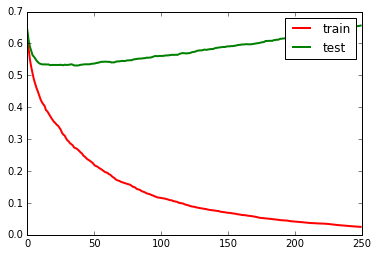

In [23]:
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
%matplotlib inline

df = pandas.read_csv('gbm-data.csv')
df_X = df[range(1,len(df.columns))].values
df_Y = np.ravel(df[[0]].values)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.8, random_state=241)

rate = [1, 0.5, 0.3, 0.2, 0.1] 

for i in [0.2]:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=i)
    clf.fit(X_train,y_train)
    
    y_gen_tr = clf.staged_decision_function(X_train)
    y_pred_tr = [1.0/(1+np.exp(-x)) for x in y_gen_tr]
    tr_ll = [log_loss(y_train,x) for x in y_pred_tr]
    
    y_gen_tst = clf.staged_decision_function(X_test)
    y_pred_tst = [1.0/(1+np.exp(-x)) for x in y_gen_tst]
    tst_ll = [log_loss(y_test,x) for x in y_pred_tst]
    
    print 'MIN',min(enumerate(tst_ll), key=itemgetter(1))
    print 'MAX',max(enumerate(tst_ll), key=itemgetter(1))
    
    plt.plot(tr_ll, 'r', linewidth=2)
    plt.plot(tst_ll, 'g', linewidth=2)
    plt.legend(['train', 'test'])
    
clf = RandomForestClassifier(n_estimators=36,random_state=241)
clf.fit(X_train,y_train)
print 'RFC',log_loss(y_test, clf.predict_proba(X_test))

##  Неделя 6
#### Assignment 1

In [111]:
from skimage.io import imread
from skimage import img_as_float
from sklearn.cluster import KMeans
image = img_as_float(imread('parrots.jpg'))

kl=11

X_train = []
for n in image:
    for m in n:
        X_train.append(m)
#X_train = np.column_stack((X_R,X_G,X_B))
km = KMeans(n_clusters=kl,init='k-means++',random_state=241)
km.fit(X_train)
X_train = np.column_stack((X_train,km.predict(X_train)))

In [112]:
print X_train[X_train[:,3]==6]

[[ 0.03921569  0.60784314  0.00784314  6.        ]
 [ 0.04705882  0.61568627  0.01568627  6.        ]
 [ 0.03921569  0.60784314  0.00784314  6.        ]
 ..., 
 [ 0.19607843  0.6         0.2745098   6.        ]
 [ 0.23137255  0.61960784  0.29803922  6.        ]
 [ 0.25098039  0.63137255  0.32156863  6.        ]]


In [113]:
clust_colors = [] #median,mean
for i in range(kl):
        clust_colors.append([sum([np.median(X_train[X_train[:,3]==i][:,j]) for j in range(3)]),
                            sum([X_train[X_train[:,3]==i][:,j].mean() for j in range(3)])])
clust_colors = np.array(clust_colors)

print X_train.shape[0]
print clust_colors#[clust_colors[:,0]==1]  
#, X_train[X_train[:,3]==i][:,j].mean()

337962
[[ 1.18823529  1.20025414]
 [ 0.03921569  0.13142023]
 [ 1.51764706  1.55766254]
 [ 1.84705882  1.82362612]
 [ 2.43529412  2.43431091]
 [ 0.77254902  0.79769216]
 [ 0.89411765  0.95212625]
 [ 1.51764706  1.51593173]
 [ 1.70196078  1.70823639]
 [ 0.89803922  0.93294354]
 [ 0.48627451  0.54774354]]


In [114]:
RSS_med = 0
RSS_mean = 0
maxI = 0
for j in X_train:
    I = sum([j[t] for t in range(3)])
    if I>maxI: 
        maxI = I
    RSS_med += (I-clust_colors[int(j[3]),0])**2
    RSS_mean += (I-clust_colors[int(j[3]),1])**2
PSLR_med = 10*np.log10((maxI**2)/(RSS_med/X_train.shape[0]))
PSLR_mean = 10*np.log10((maxI**2)/(RSS_mean/X_train.shape[0]))
print PSLR_med, PSLR_mean

23.1107018795 23.3578030924
